# Machine Learning e Árvore de decisão

### Aula 3 - Repetição da Decision Tree da Aula

#### Importação das bibliotecas

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Importação do dataset

In [24]:
md = r"C:\Users\fcpas\Documents\GitHub\PI-Materiais"

In [25]:
path = md + '\\titanic.csv'

In [26]:
df = pd.read_csv(path)

#### Relembrando os principais conceitos a serem utilizados

__Decision Tree__: série de classificadores binários criados em formato de árvore, os quais contém as seguintes estruturas:

- __Raiz__: Ponto onde a árvore se iniciará e realizará a primeira classificação. É a decisão de número $n_1$;

- __Nó__: Pontos intermediários nos quais serão realizadas todas as classificações do intervalo de $n_2$ a $n-1$;

- __Folha__: Ponto final da árvore de decisão, a partir do qual não há mais formas de diferenciar as classificações ou foi explicitamente definido pelo usuário que novas diferenciações são irrelevantes. Fica no ponto $n$ da árvore.

__Entropia__: é o grau de incerteza associado à ocorrência de um evento. Comumente, é trabalhado com a entropia binária, a qual apresenta apenas as possibilidades de sucessso (1) ou fracasso (0). Este valor pode ser obtido por meio da seguinte fórmula:

$$ \alpha = \sum_1^n p_n*log_2(p_n) $$

A distribuição da entropia de um determinado evento pode ser representada da seguinte forma:

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log2
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


<function matplotlib.pyplot.show(*args, **kw)>

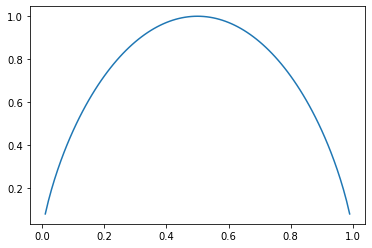

In [43]:
p = np.linspace(0.01, 1, 100)

n = 1-p

entropia = -(p*np.log2(p) + n*np.log2(n))

plt.plot(p, entropia)

plt.show

Com base na distribuição apresentada, é fácil perceber empiricamente que, quanto mais distante de uma probabilidade de 50%, menor é a entropia do evento.

__Ganho de informação__: é a redução da __entropia__ após a segregação de um conjunto de eventos em subconjuntos disjuntos. Pode ser obtida por meio da seguinte fórmula:

$$GI = \sum_i \frac{c_ip * \alpha_ip}{C_it} + \frac{c_in * \alpha_in}{C_it}$$

Em que:

GI = Ganho de informação;

c = Subconjunto disjunto do conjunto que está sendo analisado;

$C_it$ = Número total de elementos do conjunto C;

$\alpha$ = Entropia.

O ganho de informação é uma ótima métrica para avaliar se o modelo está chegando próximo a uma predição acurada dos dados, por isso, nos algoritmos de árvore de decisão, este é embutido para demonstrar se o modelo está progredindo ou não.

#### Criando a classe que conterá as funções da árvore de decisão

In [183]:
class DecisionTree():
    def __init__(self, df, var_resp, var_exp):
        self.df = df
        self.var_resp = var_resp
        self.var_exp = var_exp
        self.tamanho = len(df)
        self.possibilidades = list(self.df[self.var_resp].unique())
        self.entropia = []
        temp = 0
        for a in self.possibilidades:
            b = (len(self.df[self.df[var_resp] == a])/len(self.df))
            temp += -(b * np.log2(b))
        self.entropia.append(temp)
        
    #def entropia_binaria(self):
            
            
            
            
            
            

In [186]:
arvore = DecisionTree(df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Survived']], 'Survived', 'Pclass')

In [204]:
a = 0.5


b = 0.5

enta = a*np.log2(a)
entb = b*np.log2(b)

-(enta+entb)

1.0

In [187]:
arvore.entropia

[0.9607079018756469]

In [164]:
print(arvore.entropia)

[0, 1]


In [159]:
lista = df.Sex.value_counts()

In [161]:
lista[0]

577

In [155]:
lista

array(['male', 'female'], dtype=object)

In [94]:
arvore = DecisionTree(df.head(), df['Survived'].head(), df[['Pclass', 'Name']].head())

In [73]:
class carro():
    def __init__(self, marca, ano, litros, ligado):
        self.marca = marca
        self.ano = ano
        self.litros = litros
        self.ligado = ligado
        self.teste = 10

    def ligar(self):
        print('Carro ligado')
        self.ligado = 1
    
    def desligar(self):
        print('Carro desligado')
        self.ligado = 0
        
    def dirigir(self):
        if self.ligado == 1:
            print('Carro se movimentando')
            time.sleep(2)
            print('...')
            time.sleep(2)
            print('...')
            time.sleep(1)
            print('...')
            time.sleep(1)
            print('Chegamos.')
        else:
            print('Carro desligado. Ligue-o e tente novamente')